In [2]:
library(twitteR)
library(maps)
library(ggmap)
library(ggplot2)

In [3]:
setup_twitter_oauth("FHlYnTq8c47N1553KDVm92Nbd","MT0DdF9cfoBUWdx6TJbgBTde5MqR2iKth8fKMq52fwY55ifxmo","771914996603379712-4CbtyfbOlsYxruMjYjZaQyOyErafznU","ofkk5doXlKED3nPZJyQ2veY4etU7s1ILYihWM0Pe1GZE0")

[1] "Using direct authentication"


In the next few cells I collect tweets pertaining to various aspects of the Superbowl

In [ ]:
#This is the 1st cell collecting a set of tweets
searchTerm <- "#tombrady"
tweets <- searchTwitter(searchTerm, n = 1000)
tFrame <- twListToDF(tweets)
users <- lookupUsers(tFrame$screenName)

userLocFrame <- twListToDF(users)
locations <- geocode(userLocFrame$location)
locDF1 <- data.frame(locations$lon, locations$lat)

In [4]:
#This is the 2nd cell collecting a set of tweets
searchTerm <- "#superbowl"
tweets <- searchTwitter(searchTerm, n = 1000)
tFrame <- twListToDF(tweets)
users <- lookupUsers(tFrame$screenName)

userLocFrame <- twListToDF(users)
locations <- geocode(userLocFrame$location)
locDF2 <- data.frame(locations$lon, locations$lat)

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Venezuela.&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Auckland%20City,%20New%20Zealand&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Constan%C5%A3a,%20Rom%C3%A2nia&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Mexico%20&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=The%20Sun&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Dallas,%20Texas&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=San%20Antonio,%20TX&sensor=false


In [ ]:
#This is the 3rd cell collecting a set of tweets
searchTerm <- "#patriots"
tweets <- searchTwitter(searchTerm, n = 1000)
tFrame <- twListToDF(tweets)
users <- lookupUsers(tFrame$screenName)

userLocFrame <- twListToDF(users)
locations <- geocode(userLocFrame$location)
locDF3 <- data.frame(locations$lon, locations$lat)

In [ ]:
#This is the 4th cell collecting a set of tweets
searchTerm <- "falcons"
tweets <- searchTwitter(searchTerm, n = 1000)
tFrame <- twListToDF(tweets)
users <- lookupUsers(tFrame$screenName)

userLocFrame <- twListToDF(users)
locations <- geocode(userLocFrame$location)
locDF4 <- data.frame(locations$lon, locations$lat)

In [ ]:
#This is the 5th cell collecting a set of tweets
searchTerm <- "halftimeshow"
tweets <- searchTwitter(searchTerm, n = 1000)
tFrame <- twListToDF(tweets)
users <- lookupUsers(tFrame$screenName)

userLocFrame <- twListToDF(users)
locations <- geocode(userLocFrame$location)
locDF5 <- data.frame(locations$lon, locations$lat)

In [ ]:
#This is the 6th cell collecting a set of tweets
searchTerm <- "mattryan"
tweets <- searchTwitter(searchTerm, n = 1000)
tFrame <- twListToDF(tweets)
users <- lookupUsers(tFrame$screenName)

userLocFrame <- twListToDF(users)
locations <- geocode(userLocFrame$location)
locDF6 <- data.frame(locations$lon, locations$lat)

In the next cell I merge the dataframes into one large dataframe containing the lat and lon

In [ ]:
#Merging the data frames
merge12 <- rbind (rbind(locDF1, locDF2))
merge34 <- rbind (rbind(locDF3, locDF4))
merge56 <- rbind (rbind(locDF5, locDF6))
merge1234 <- rbind(merge12, merge34)
locDFMerge <- rbind(merge1234, merge56)

In [ ]:
write.csv(locDFMerge, file = "TwitterDat.csv")

In [6]:
adf <- read.csv("TwitterDat.csv")

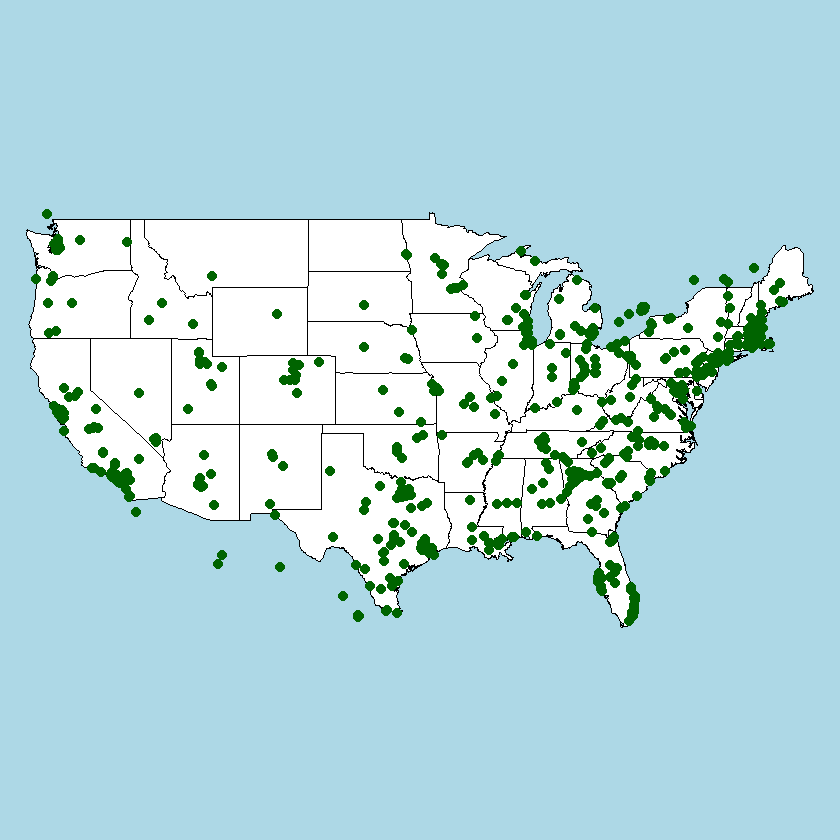

In [7]:
# Plot points on the map to look at the density of tweets in different regions. This is not the final plot. This is just to get an idea of the distribution of tweets across the nation
#This piece of code has been largely inspired by an example on the file "RonJupyter" on the official course webpage  
map("state", fill=TRUE, col="white", bg="lightblue", mar=c(0,0,0,0))
points(adf$locations.lon,adf$locations.lat, col="darkgreen", cex = 1.1, pch=19)

In [ ]:
myLoc <- geocode(c("New York", "Boston", "Philadelphia" ,"Washington DC", "Atlanta", "Orlando", "Miami", "Houston", "Dallas", "Chicago", "Denver", "Salt Lake City" ,"Seattle", "San Francisco" ,"Los Angeles", "Minneapolis", "Portland", "Detroit", "New Orleans", "Phoenix"))

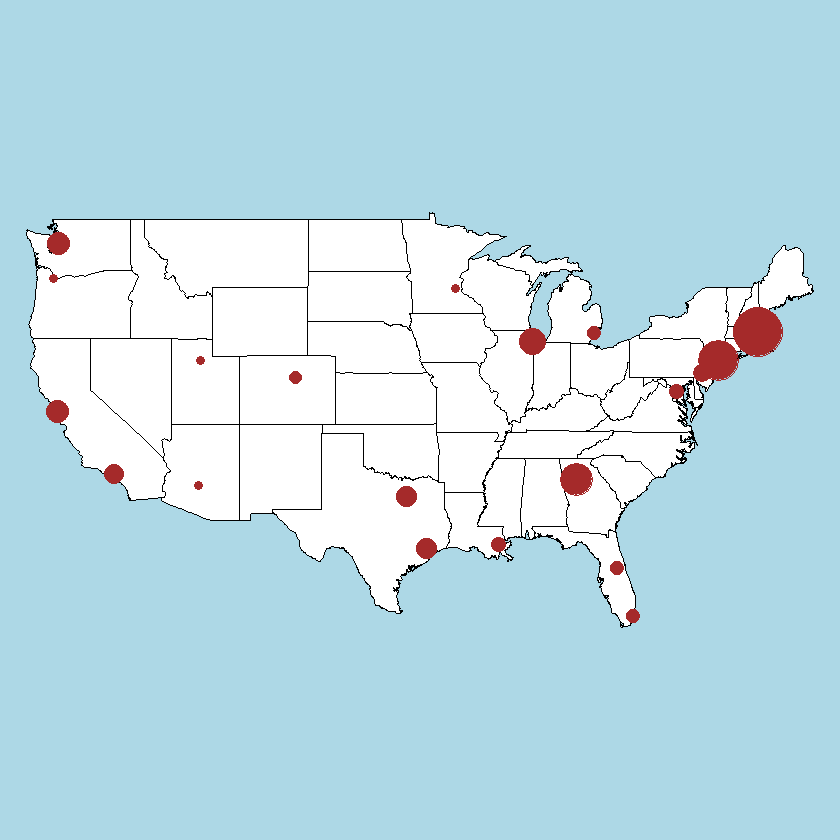

In [18]:
#This is the final plot. Blobs of varying sizes show the density of tweets from that region
map("state", fill=TRUE, col="white", bg="lightblue", mar=c(0,0,0,0))
points(myLoc$lon,myLoc$lat, col="brown", cex = c(4.5, 5.5, 2, 1.7, 3.7, 1.6, 1.5, 2.3, 2.3, 3, 1.4, 1, 2.5, 2.5, 2.2, 1, 1, 1.5, 1.7, 1), pch=19)